In [21]:
#Importamos las librerias que vamos a usar
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [3]:
hoteles = pd.read_csv('/content/drive/MyDrive/Proyecto_Final/OtrasFuentes/hoteles.csv')

In [4]:
hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137736 entries, 0 to 137735
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   business_id    137736 non-null  object
 1   name           137736 non-null  object
 2   categories     137736 non-null  object
 3   fecha          137736 non-null  object
 4   review_id      137736 non-null  object
 5   comentario     137736 non-null  object
 6   rating         137736 non-null  int64 
 7   c_util         137736 non-null  int64 
 8   c_cool         137736 non-null  int64 
 9   c_chistoso     137736 non-null  int64 
 10  user_id        137736 non-null  object
 11  ciudad         137736 non-null  object
 12  estado         137736 non-null  object
 13  codigo_postal  137736 non-null  object
dtypes: int64(4), object(10)
memory usage: 14.7+ MB


> De acuerdo con el informe anterior tenemos en total 14 columnas  y 137736 registros o filas, por otra parte, aparentemente no tenemos registros nulos, la mayor parte de los datos son de tipo objeto, anuque hay algunos de tipo entero.

#**Resumen Estadístico**

In [11]:
#Analisis estadístico las variables númericas
analisis =round(hoteles.describe(include=[np.number]),0)
analisis

,rating,c_util,c_cool,c_chistoso
count,137736.0,137736.0,137736.0,137736.0
mean,3.0,1.0,0.0,0.0
std,2.0,3.0,2.0,1.0
min,1.0,0.0,0.0,0.0
25%,2.0,0.0,0.0,0.0
50%,3.0,0.0,0.0,0.0
75%,5.0,1.0,0.0,0.0
max,5.0,187.0,171.0,99.0


> De acuerdo con el análisis estadístico anterior la media del rating es 3.0, para útil es 1.0, cool 2.0 y chistoso es 1.0, se observan además las respectivas medidas de la desviación estándar, mínimo, máximo, primero, segundo y tercer cuartil.

In [28]:
#Analisis estadístico de las variables categoricas
hoteles.describe(include=object)

,business_id,name,categories,fecha,review_id,comentario,user_id,ciudad,estado,codigo_postal
count,137736,137736,137736,137736,137736,137736,137736,137736,137736,137736
unique,2152,2006,431,5451,137736,137491,114767,196,14,451
top,wz8ZPfySQczcPgSyd33-HQ,Grand Sierra Resort and Casino,"Event Planning & Services, Hotels, Hotels & Tr...","2017-05-29 00:00:00,000",EnzjNm3zW5YXKBbvtxDj_g,I visited this hotel last month and found a us...,_BcWyKQL16ndpBdggh2kNA,New Orleans,Louisiana,70130
freq,3634,3634,11070,97,1,3,43,22408,24495,12460


> Para el caso de las variables cualitativas la más frecuentes o top en cuanto a ciudad es _New Orleans_, estado _Lousiana_, se observan además los valores únicos para cada una de estas variables y cantidad de observaciones.

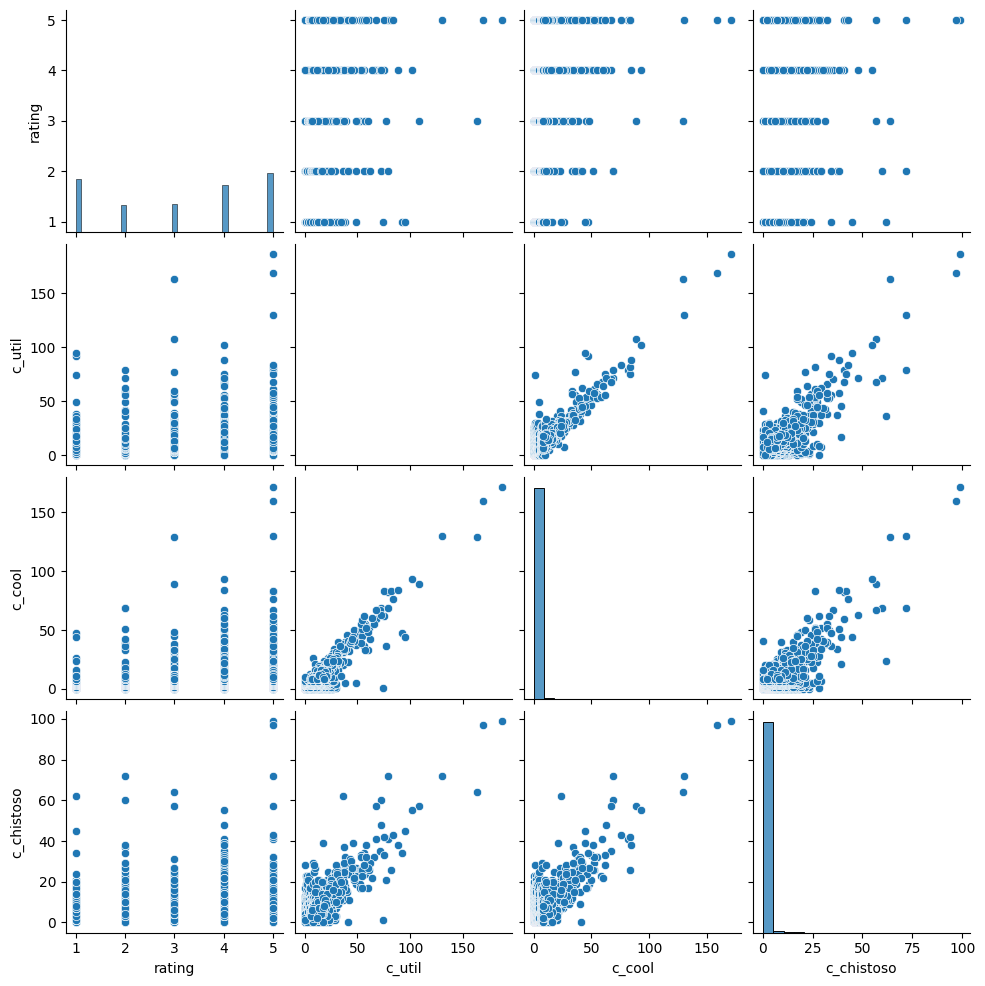

In [13]:
#Hacemos un grafico donde tengamos los histogramas y graficos de dispersión de las variables anteriores
sns.pairplot(data=hoteles)

>  En la gráfica de pairplot anterior se observa que el rating no se relaciona con ninguna de las demás variables numericas presentes en la base da datos, mientras que las variables _c_util_, _c_cool_, _c_chistoso_, se relacionan de forma positiva entre ellas. Adicionalmente, se observa en los histogramas de la diagonal, que ninguna de estas variables se comporta de acuerdo con la distribución normal.

# **Correlación entre las variables**

In [16]:
matriz = hoteles.corr()
round(matriz,2)

<ipython-input-16-40d0e638bb83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = hoteles.corr()


,rating,c_util,c_cool,c_chistoso
rating,1.00,-0.03,0.09,-0.02
c_util,-0.03,1.00,0.82,0.75
c_cool,0.09,0.82,1.00,0.80
c_chistoso,-0.02,0.75,0.80,1.00


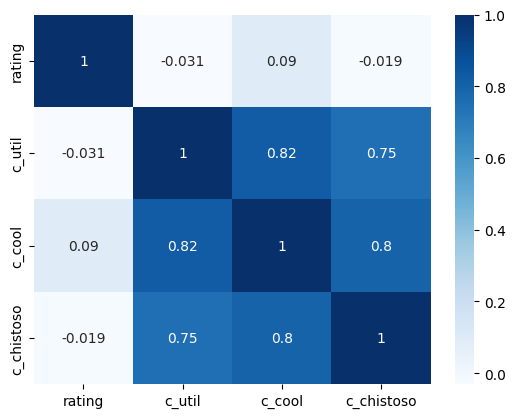

In [17]:
sns.heatmap(matriz, cmap='Blues', annot=True);

> Como ya habiamos observado en la grafica de pairplot las variables _c_util_,
_c_cool_ , _c_chistoso_ , presentan una correlacion fuerte como se aprecia en el mapa de calor de la matriz de correlación.

# Nube de palabras

In [19]:
#se filtran las columna comentario
new_df =hoteles[['comentario']].copy()
new_df.rename(columns={'comentario':'review'}, inplace=True)

In [20]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    if isinstance(texto, float):  # Verificar si el valor es de tipo float
        return []  # Devolver una lista vacía en caso de que sea float

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return(nuevo_texto)

In [22]:
# Se aplica la función de limpieza y tokenización a cada pelicula
# ==============================================================================
new_df['review_tokenizado'] = new_df['review'].apply(lambda x: limpiar_tokenizar(x))
new_df[['review', 'review_tokenizado']].head()

,review,review_tokenizado
0,Perfectly located in the French Quarter. \n\...,"[perfectly, located, in, the, french, quarter,..."
1,Had a lovely stay recently for our 25th annive...,"[had, lovely, stay, recently, for, our, th, an..."
2,I wouldn't stay anywhere else in NOLA! Everyt...,"[wouldn, stay, anywhere, else, in, nola, every..."
3,I would live here. I couldn't stop adding extr...,"[would, live, here, couldn, stop, adding, extr..."
4,I started my own tradition of coming to New Or...,"[started, my, own, tradition, of, coming, to, ..."


In [23]:
# Unnest de la columna comentario_tokenizado
# ==============================================================================
review_tidy = new_df.explode(column='review_tokenizado')
review_tidy  = review_tidy .drop(columns='review')
review_tidy  = review_tidy .rename(columns={'review_tokenizado':'token'})
review_tidy .head(3)

,token
0,perfectly
0,located
0,in


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [26]:
# Filtrado para excluir stopwords
# ==============================================================================
review_tidy= review_tidy[~(review_tidy["token"].isin(stop_words))]

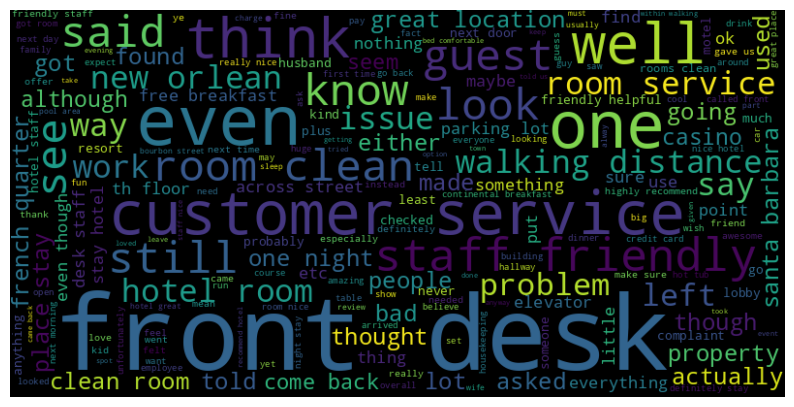

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir todos los tokens en un solo texto
all_tokens = ' '.join(review_tidy['token'].astype(str))

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_tokens)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

> En la nube de palabras anterior se observa que las 5 palabras que aparcen con mayor frecuencia en las reseñas de los usuarios de los hoteles son:

* front
* desk
* even
* one
* well